In [57]:
from pyarc.data_structures import ClassAssocationRule
from pyids.data_structures import IDSRule
from pyids.model_selection.utils import encode_label
from sklearn.metrics import roc_auc_score
import logging
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def print_cars(ids_cars):
    cars = ids_cars
    is_ids = False
    if type(ids_cars[0]) == IDSRule:
        is_ids = [ r.f1 for r in ids_cars ]
        cars = [ r.car for r in ids_cars ]
    latex = []
    for idx, car in enumerate(cars):
        if is_ids:
            latex.append(car_to_latex(car, is_ids=is_ids[idx]))
        else:
            latex.append(car_to_latex(car))
        
    return "\n\n".join(latex)
        
def car_to_latex(car, is_ids=False):
    trans = {
        "-":  r"\-",
        "_":  r"\_",
        "]":  r"\]",
        "\\": r"\\",
        "^":  r"\^",
        "$":  r"\$",
        "*":  r"\*",
        ".":  r"\."
    }
    latex = []
    
    latex.append("If")
    
    for idx, predicate in enumerate(car.antecedent):
       
        name, interval = predicate
        name = name.translate(str.maketrans(trans))
        
        interval_string = interval.translate(str.maketrans(trans))
        
        if idx != 0:
            latex.append("and")
        latex.append(
            f"\\textcolor{{blue}}{{{name}}}=\\textcolor{{gray}}{{{interval_string}}}"
        )

        
    class_name, class_value = car.consequent
    
    latex.append("then")
    latex.append(
        f"\\textcolor{{red}}{{{class_name}}}=\\textcolor{{gray}}{{{class_value}}}"
    )
    
    if is_ids:
        latex.append(
            f"$\mid$ f1-score: \\textit{{{round(is_ids, 2)}}}"
        )
    
    return " ".join(latex)

# IDS Demonstration

## Importing required libraries

In [3]:
import pandas as pd
import pyarc
from pyids import IDS
from pyids.algorithms.ids_classifier import mine_CARs
from pyids.rule_mining import RuleMiner
from pyarc.qcba.data_structures import QuantitativeDataFrame

from sklearn.model_selection import train_test_split

## Loading the test and train data

In [4]:
data = pd.read_csv("../data/titanic.csv").sample(frac=1).reset_index(drop=True)


data_train, data_test = train_test_split(data, test_size=0.8)

In [5]:
data.head()

,Passenger_Cat,Age_Cat,Gender,Died
0,3rd_class,child,male,1
1,3rd_class,adult,female,0
2,crew,adult,male,1
3,3rd_class,adult,male,1
4,crew,adult,male,1


In [6]:
rm = RuleMiner()
rules = rm.mine_rules(data_train)

[CAR {Age_Cat=adult} => {Died=1} sup: 0.96 conf: 0.00 len: 2, id: 20, CAR {Age_Cat=adult} => {Died=0} sup: 0.96 conf: 0.00 len: 2, id: 21, CAR {Gender=male} => {Died=1} sup: 0.75 conf: 0.00 len: 2, id: 16, CAR {Gender=male} => {Died=0} sup: 0.75 conf: 0.00 len: 2, id: 17, CAR {Gender=male,Age_Cat=adult} => {Died=1} sup: 0.71 conf: 0.00 len: 3, id: 18, CAR {Gender=male,Age_Cat=adult} => {Died=0} sup: 0.71 conf: 0.00 len: 3, id: 19, CAR {Passenger_Cat=crew} => {Died=1} sup: 0.43 conf: 0.00 len: 2, id: 10, CAR {Passenger_Cat=crew} => {Died=0} sup: 0.43 conf: 0.00 len: 2, id: 11, CAR {Passenger_Cat=crew,Age_Cat=adult} => {Died=1} sup: 0.43 conf: 0.00 len: 3, id: 8, CAR {Passenger_Cat=crew,Age_Cat=adult} => {Died=0} sup: 0.43 conf: 0.00 len: 3, id: 9, CAR {Passenger_Cat=crew,Gender=male} => {Died=1} sup: 0.42 conf: 0.00 len: 3, id: 14, CAR {Passenger_Cat=crew,Gender=male} => {Died=0} sup: 0.42 conf: 0.00 len: 3, id: 15, CAR {Gender=male,Passenger_Cat=crew,Age_Cat=adult} => {Died=1} sup: 0.4

D:\programy\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\programy\Anaconda\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [7]:
print(print_cars(rules))

If \textcolor{blue}{Age\_Cat}=\textcolor{gray}{adult} then \textcolor{red}{Died}=\textcolor{gray}{1}

If \textcolor{blue}{Age\_Cat}=\textcolor{gray}{adult} then \textcolor{red}{Died}=\textcolor{gray}{0}

If \textcolor{blue}{Gender}=\textcolor{gray}{male} then \textcolor{red}{Died}=\textcolor{gray}{1}

If \textcolor{blue}{Gender}=\textcolor{gray}{male} then \textcolor{red}{Died}=\textcolor{gray}{0}

If \textcolor{blue}{Gender}=\textcolor{gray}{male} and \textcolor{blue}{Age\_Cat}=\textcolor{gray}{adult} then \textcolor{red}{Died}=\textcolor{gray}{1}

If \textcolor{blue}{Gender}=\textcolor{gray}{male} and \textcolor{blue}{Age\_Cat}=\textcolor{gray}{adult} then \textcolor{red}{Died}=\textcolor{gray}{0}

If \textcolor{blue}{Passenger\_Cat}=\textcolor{gray}{crew} then \textcolor{red}{Died}=\textcolor{gray}{1}

If \textcolor{blue}{Passenger\_Cat}=\textcolor{gray}{crew} then \textcolor{red}{Died}=\textcolor{gray}{0}

If \textcolor{blue}{Passenger\_Cat}=\textcolor{gray}{crew} and \textcolor{bl

In [8]:
quant_dataframe_train = QuantitativeDataFrame(data_train)
quant_dataframe_test = QuantitativeDataFrame(data_test)

## Mining the Class Association Rules (CARs)

## Training the IDS Model

In [9]:
ids = IDS()
ids.fit(class_association_rules=rules, quant_dataframe=quant_dataframe_train, random_seed=5)

In [10]:
print(print_cars(ids.clf.rules))

If \textcolor{blue}{Age\_Cat}=\textcolor{gray}{adult} then \textcolor{red}{Died}=\textcolor{gray}{1} $\mid$ f1-score: \textit{0.65}

If \textcolor{blue}{Gender}=\textcolor{gray}{male} then \textcolor{red}{Died}=\textcolor{gray}{1} $\mid$ f1-score: \textit{0.59}

If \textcolor{blue}{Passenger\_Cat}=\textcolor{gray}{crew} then \textcolor{red}{Died}=\textcolor{gray}{1} $\mid$ f1-score: \textit{0.32}

If \textcolor{blue}{Passenger\_Cat}=\textcolor{gray}{3rd\_class} then \textcolor{red}{Died}=\textcolor{gray}{1} $\mid$ f1-score: \textit{0.22}

If \textcolor{blue}{Passenger\_Cat}=\textcolor{gray}{crew} and \textcolor{blue}{Gender}=\textcolor{gray}{male} then \textcolor{red}{Died}=\textcolor{gray}{0} $\mid$ f1-score: \textit{0.1}


In [11]:
ids.clf.default_class

'1'

In [12]:
ids.clf.default_class_confidence

1

## Evaluating the IDS model

In [16]:
print("Accuracy on train data: ", ids.score(quant_dataframe_train))
print("Accuracy on test data: ", ids.score(quant_dataframe_test))

Accuracy on train data:  0.6732954545454546
Accuracy on test data:  0.6685592618878637


In [18]:
print("AUC on train data: ", ids.score_auc(quant_dataframe_train))
print("AUC on test data: ", ids.score_auc(quant_dataframe_test))

AUC on train data:  0.47982021647404144
AUC on test data:  0.47099660388166775


In [18]:
ids.score_interpretability_metrics(quant_dataframe_train)

{'fraction_overlap': 0.18551136363636367,
 'fraction_classes': 0.5,
 'fraction_uncovered': 0.13068181818181812,
 'average_rule_width': 2.0,
 'ruleset_length': 5}

In [19]:
ids.score_interpretability_metrics(quant_dataframe_test)

{'fraction_overlap': 0.18715400993612497,
 'fraction_classes': 0.5,
 'fraction_uncovered': 0.1312987934705464,
 'average_rule_width': 2.0,
 'ruleset_length': 5}

In [21]:
from pyids.model_selection import CoordinateAscent
from pyids.algorithms.ids import IDS
from pyids.algorithms import mine_CARs, mine_IDS_ruleset

from pyarc.qcba.data_structures import QuantitativeDataFrame

import pandas as pd
import numpy as np

df_iris = pd.read_csv("../data/titanic.csv")
quant_df = QuantitativeDataFrame(df_iris)
cars = mine_CARs(df_iris, 20)


interpretability_bounds = dict(
    fraction_overlap=0.1,
    fraction_classes=1,
    fraction_uncovered=0.15,
    average_rule_width=8,
    ruleset_length=10
)

def is_solution_interpretable(metrics):
    print(metrics)
    return (
        metrics["fraction_overlap"] <= interpretability_bounds["fraction_overlap"] and
        metrics["fraction_classes"] >= interpretability_bounds["fraction_classes"] and
        metrics["fraction_uncovered"] <= interpretability_bounds["fraction_uncovered"] and
        metrics["average_rule_width"] <= interpretability_bounds["average_rule_width"] and
        metrics["ruleset_length"] <= interpretability_bounds["ruleset_length"]
    )

def solution_interpretability_distance(metrics):
    distance_vector = np.array([
        max(metrics["fraction_overlap"] - interpretability_bounds["fraction_overlap"], 0),
        max(interpretability_bounds["fraction_classes"] - metrics["fraction_classes"], 0),
        max(metrics["fraction_uncovered"] - interpretability_bounds["fraction_uncovered"], 0),
        max(metrics["average_rule_width"] - interpretability_bounds["average_rule_width"], 0),
        max(metrics["ruleset_length"] - interpretability_bounds["ruleset_length"], 0)
    ])
    return np.sum(distance_vector)
    #return np.linalg.norm(distance_vector)

def fmax(lambda_dict):
    print(lambda_dict)
    ids = IDS(algorithm="SLS")
    ids.fit(class_association_rules=cars, quant_dataframe=quant_df, lambda_array=list(lambda_dict.values()))

    metrics = ids.score_interpretability_metrics(quant_df)

    """
    if not is_solution_interpretable(metrics):
        distance = -solution_interpretability_distance(metrics)
        print(distance)
        return -distance
    """

    if not is_solution_interpretable(metrics):
        return 0

    auc = ids.score_auc(quant_df)

    print(auc)

    return auc



coord_asc = CoordinateAscent(
    func=fmax,
    func_args_ranges=dict(
        l1=(1, 1000),
        l2=(1, 1000),
        l3=(1, 1000),
        l4=(1, 1000),
        l5=(1, 1000),
        l6=(1, 1000),
        l7=(1, 1000)
    ),
    ternary_search_precision=50,
    max_iterations=2
)

best_pars = coord_asc.fit()

df = pd.DataFrame(coord_asc.procedure_data)


{'l1': 979, 'l2': 372, 'l3': 345, 'l4': 198, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.0, 'fraction_classes': 1.0, 'fraction_uncovered': 0.7160704145371948, 'average_rule_width': 2.6666666666666665, 'ruleset_length': 3}
using precision 50
{'l1': 334.0, 'l2': 372, 'l3': 345, 'l4': 198, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.01372326329736892, 'fraction_classes': 1.0, 'fraction_uncovered': 0.9153889835320841, 'average_rule_width': 2.5, 'ruleset_length': 4}
{'l1': 667.0, 'l2': 372, 'l3': 345, 'l4': 198, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.12985046375165626, 'fraction_classes': 1.0, 'fraction_uncovered': 0.2464508801817149, 'average_rule_width': 2.6666666666666665, 'ruleset_length': 3}
{'l1': 223.0, 'l2': 372, 'l3': 345, 'l4': 198, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.014034233795732943, 'fraction_classes': 1.0, 'fraction_uncovered': 0.2890403180011357, 'average_rule_width': 2.4285714285714284, 'ruleset_length': 7}
{'l1'

{'fraction_overlap': 0.0017035775127768312, 'fraction_classes': 1.0, 'fraction_uncovered': 0.6405451448040886, 'average_rule_width': 2.3333333333333335, 'ruleset_length': 6}
{'l1': 148.3909465020576, 'l2': 242.48971193415636, 'l3': 345, 'l4': 198, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.020670073821692222, 'fraction_classes': 1.0, 'fraction_uncovered': 0.16411130039750144, 'average_rule_width': 2.4, 'ruleset_length': 5}
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 345, 'l4': 198, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.07615622436746797, 'fraction_classes': 1.0, 'fraction_uncovered': 0.09540034071550252, 'average_rule_width': 2.3333333333333335, 'ruleset_length': 9}
0.709644582018077
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 345, 'l4': 198, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.007634551075777651, 'fraction_classes': 1.0, 'fraction_uncovered': 0.6036342986939238, 'average_rule_width': 2.4444444444444446, 'rule

{'fraction_overlap': 0.004171580832568907, 'fraction_classes': 1.0, 'fraction_uncovered': 0.17376490630323682, 'average_rule_width': 2.6923076923076925, 'ruleset_length': 13}
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 280.55555555555554, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.017279143343879286, 'fraction_classes': 1.0, 'fraction_uncovered': 0.09540034071550252, 'average_rule_width': 2.25, 'ruleset_length': 8}
0.7096416673224732
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 258.6296296296296, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.01783077796706417, 'fraction_classes': 1.0, 'fraction_uncovered': 0.1726291879613856, 'average_rule_width': 2.1666666666666665, 'ruleset_length': 6}
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 302.48148148148147, 'l5': 671, 'l6': 258, 'l7': 392}
{'fraction_overlap': 0.0061707363240583015, 'fraction_classes': 1.0, '

{'fraction_overlap': 0.035288391336091504, 'fraction_classes': 1.0, 'fraction_uncovered': 0.1470755252697331, 'average_rule_width': 2.2857142857142856, 'ruleset_length': 7}
0.7052492210475998
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 556.0, 'l7': 392}
{'fraction_overlap': 0.0422041048105784, 'fraction_classes': 1.0, 'fraction_uncovered': 0.14253265190232822, 'average_rule_width': 2.375, 'ruleset_length': 8}
0.705186555092119
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 778.0, 'l7': 392}
{'fraction_overlap': 0.00015142911224682944, 'fraction_classes': 1.0, 'fraction_uncovered': 0.8682566723452584, 'average_rule_width': 2.6666666666666665, 'ruleset_length': 6}
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 482.0, 'l7': 392}


{'fraction_overlap': 0.016808631459398073, 'fraction_classes': 1.0, 'fraction_uncovered': 0.17206132879046, 'average_rule_width': 2.0, 'ruleset_length': 6}
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 44.85185185185185}
{'fraction_overlap': 0.002101078932424759, 'fraction_classes': 1.0, 'fraction_uncovered': 0.8796138557637706, 'average_rule_width': 2.2, 'ruleset_length': 5}
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 88.7037037037037}
{'fraction_overlap': 0.00034071550255536625, 'fraction_classes': 1.0, 'fraction_uncovered': 0.29074389551391255, 'average_rule_width': 2.5, 'ruleset_length': 6}
{'l1': 148.3909465020576, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 30.23456790

{'fraction_overlap': 0.0028708435863461423, 'fraction_classes': 1.0, 'fraction_uncovered': 0.5741056218057922, 'average_rule_width': 2.4444444444444446, 'ruleset_length': 9}
{'l1': 112.25377229080931, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 39.97942386831275}
{'fraction_overlap': 0.0, 'fraction_classes': 1.0, 'fraction_uncovered': 0.4179443498012493, 'average_rule_width': 2.8333333333333335, 'ruleset_length': 6}
{'l1': 94.92958390489254, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 39.97942386831275}
{'fraction_overlap': 0.04331954246775371, 'fraction_classes': 1.0, 'fraction_uncovered': 0.1465076660988075, 'average_rule_width': 2.2857142857142856, 'ruleset_length': 7}
0.7053264604810996
{'l1': 103.59167809785092, 'l2': 261.9794238683127, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.4897119341

{'fraction_overlap': 0.006372641807054073, 'fraction_classes': 1.0, 'fraction_uncovered': 0.5638841567291312, 'average_rule_width': 2.4444444444444446, 'ruleset_length': 9}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 353.4897119341564, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 39.97942386831275}
{'fraction_overlap': 0.0, 'fraction_classes': 1.0, 'fraction_uncovered': 0.22089721749006241, 'average_rule_width': 2.3333333333333335, 'ruleset_length': 6}
using precision 25.0
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 334.0, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 39.97942386831275}
{'fraction_overlap': 0.02443822503447716, 'fraction_classes': 1.0, 'fraction_uncovered': 0.10278250993753546, 'average_rule_width': 2.5, 'ruleset_length': 8}
0.7086375546869763
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 667.0, 'l4': 234.26748971193416, 'l5': 20.489711934156375, 'l6': 426

{'fraction_overlap': 0.039750141964792735, 'fraction_classes': 1.0, 'fraction_uncovered': 0.17490062464508804, 'average_rule_width': 2.5, 'ruleset_length': 6}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 223.0, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 39.97942386831275}
{'fraction_overlap': 0.0035694005029609805, 'fraction_classes': 1.0, 'fraction_uncovered': 0.7932992617830779, 'average_rule_width': 2.5, 'ruleset_length': 8}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 445.0, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 39.97942386831275}
{'fraction_overlap': 0.02247099862091344, 'fraction_classes': 1.0, 'fraction_uncovered': 0.1362862010221465, 'average_rule_width': 2.7142857142857144, 'ruleset_length': 7}
0.7060952114465926
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 371.0, 'l5': 20.489711934156375, 'l6': 426.5761316872428, 'l7': 39.979423868

{'fraction_overlap': 0.031118682566723455, 'fraction_classes': 1.0, 'fraction_uncovered': 0.16978989210675755, 'average_rule_width': 2.6666666666666665, 'ruleset_length': 6}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 852.0, 'l6': 426.5761316872428, 'l7': 39.97942386831275}
{'fraction_overlap': 0.001135718341851221, 'fraction_classes': 1.0, 'fraction_uncovered': 0.9755820556501987, 'average_rule_width': 2.5, 'ruleset_length': 4}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 654.6666666666666, 'l6': 426.5761316872428, 'l7': 39.97942386831275}
{'fraction_overlap': 0.022572402044293016, 'fraction_classes': 1.0, 'fraction_uncovered': 0.1465076660988075, 'average_rule_width': 2.375, 'ruleset_length': 8}
0.7053293751767034
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 753.3333333333334, 'l6': 426.5761316

{'fraction_overlap': 0.0010789324247586598, 'fraction_classes': 1.0, 'fraction_uncovered': 0.8983532084043158, 'average_rule_width': 2.6, 'ruleset_length': 5}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 729.1065386374028, 'l6': 66.77777777777777, 'l7': 39.97942386831275}
{'fraction_overlap': 0.0003785727806170736, 'fraction_classes': 1.0, 'fraction_uncovered': 0.1465076660988075, 'average_rule_width': 2.0, 'ruleset_length': 4}
0.7053264604810996
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 729.1065386374028, 'l6': 132.55555555555554, 'l7': 39.97942386831275}
{'fraction_overlap': 0.011120575430626538, 'fraction_classes': 1.0, 'fraction_uncovered': 0.20272572402044287, 'average_rule_width': 2.7777777777777777, 'ruleset_length': 9}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 729.1065386374028, 'l6'

{'fraction_overlap': 0.0037046050674670776, 'fraction_classes': 1.0, 'fraction_uncovered': 0.4128336172629188, 'average_rule_width': 2.4285714285714284, 'ruleset_length': 7}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 729.1065386374028, 'l6': 9.662094192958389, 'l7': 421.70370370370375}
{'fraction_overlap': 0.0014511956590321155, 'fraction_classes': 1.0, 'fraction_uncovered': 0.17546848381601365, 'average_rule_width': 2.5555555555555554, 'ruleset_length': 9}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 729.1065386374028, 'l6': 9.662094192958389, 'l7': 363.2345679012346}
{'fraction_overlap': 0.019415375463075635, 'fraction_classes': 1.0, 'fraction_uncovered': 0.20159000567859164, 'average_rule_width': 2.2857142857142856, 'ruleset_length': 7}
{'l1': 103.59167809785092, 'l2': 22.65523548239597, 'l3': 9.662094192958389, 'l4': 244.65523548239594, 'l5': 729.1065386

In [71]:
pars = [round(x, 2) for x in best_pars]

pars_df = pd.DataFrame({
    "parametr": [ f"$\lambda_{i}$" for i in range(1, 8) ],
    "hodnota parametru": pars
})

print(pars_df.to_latex(index=False, escape=False))

\begin{tabular}{lr}
\toprule
    parametr &  hodnota parametru \\
\midrule
 $\lambda_1$ &             148.39 \\
 $\lambda_2$ &             261.98 \\
 $\lambda_3$ &             353.49 \\
 $\lambda_4$ &             234.27 \\
 $\lambda_5$ &             671.00 \\
 $\lambda_6$ &             258.00 \\
 $\lambda_7$ &             392.00 \\
\bottomrule
\end{tabular}



In [31]:
ids = IDS()
ids.fit(class_association_rules=rules, quant_dataframe=quant_dataframe_train, lambda_array=best_pars)
ids.score_auc(quant_dataframe_test)

0.7080690771378042

In [80]:
metric_df = pd.DataFrame([
    {"Data": "Trénovací", "Správnost": ids.score(quant_dataframe_train), "AUC": ids.score_auc(quant_dataframe_train)},
    {"Data": "Testovací", "Správnost": ids.score(quant_dataframe_test), "AUC": ids.score_auc(quant_dataframe_test)}
])

metric_df

,AUC,Data,Správnost
0,0.702036,Trénovací,0.764205
1,0.708069,Testovací,0.767921


In [86]:
metric_df["Správnost"] = metric_df["Správnost"].apply(lambda x: round(x, 2))
metric_df["AUC"] = metric_df["AUC"].apply(lambda x: round(x, 2))
print(metric_df[["Data", "Správnost", "AUC"]].to_latex(index=False))

\begin{tabular}{lrr}
\toprule
      Data &  Správnost &   AUC \\
\midrule
 Trénovací &       0.76 &  0.70 \\
 Testovací &       0.77 &  0.71 \\
\bottomrule
\end{tabular}



In [72]:
ids.score_interpretability_metrics(quant_dataframe_test)

{'fraction_overlap': 0.11426543647977289,
 'fraction_classes': 1.0,
 'fraction_uncovered': 0.0,
 'average_rule_width': 1.5714285714285714,
 'ruleset_length': 7}

In [73]:
int_df = pd.DataFrame(
    [ids.score_interpretability_metrics(quant_dataframe_train),
     ids.score_interpretability_metrics(quant_dataframe_test)]
)

In [85]:
int_df_T = int_df.T
int_df_T.columns = ["Trénovací data", "Testovací data"]
print(int_df_T.applymap(lambda x: round(x, 2)).to_latex(escape=True))

\begin{tabular}{lrr}
\toprule
{} &  Trénovací data &  Testovací data \\
\midrule
average\_rule\_width &            1.57 &            1.57 \\
fraction\_classes   &            1.00 &            1.00 \\
fraction\_overlap   &            0.12 &            0.11 \\
fraction\_uncovered &            0.00 &            0.00 \\
ruleset\_length     &            7.00 &            7.00 \\
\bottomrule
\end{tabular}



In [43]:
procedure_data = coord_asc.procedure_data

In [51]:
procedure_df = pd.DataFrame(procedure_data).reset_index()


In [52]:
procedure_df

,index,current_lambda_param,current_params,iteration,loss
0,0,None,"{'l1': 979, 'l2': 372, 'l3': 345, 'l4': 198, '...",-1,0.000000
1,1,l1,"{'l1': 148.3909465020576, 'l2': 372, 'l3': 345...",0,0.000000
2,2,l2,"{'l1': 148.3909465020576, 'l2': 261.9794238683...",0,0.000000
3,3,l3,"{'l1': 148.3909465020576, 'l2': 261.9794238683...",0,0.000000
4,4,l4,"{'l1': 148.3909465020576, 'l2': 261.9794238683...",0,0.708679
5,5,l5,"{'l1': 148.3909465020576, 'l2': 261.9794238683...",0,0.000000
6,6,l6,"{'l1': 148.3909465020576, 'l2': 261.9794238683...",0,0.000000
7,7,l7,"{'l1': 148.3909465020576, 'l2': 261.9794238683...",0,0.000000
8,8,l1,"{'l1': 103.59167809785092, 'l2': 261.979423868...",1,0.000000
9,9,l2,"{'l1': 103.59167809785092, 'l2': 22.6552354823...",1,0.000000


Text(0, 0.5, 'Nákladová funkce')

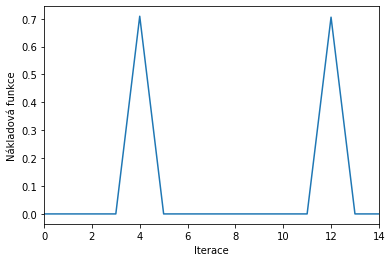

In [61]:
procedure_df.plot("index", "loss", legend=False)
plt.xlabel("Iterace")
plt.ylabel("Nákladová funkce")
